In [37]:





import re
from requests import get
import requests
import os
import dotenv
dotenv.load_dotenv()

ACCESS_TOKEN = os.getenv("OPEN_CITATION_API_KEY")


API_CALL = "https://opencitations.net/api/v1/metadata/10.1108/jd-12-2013-0166"
HTTP_HEADERS = {"authorization": "94762995-8420-4272-a366-8b7aad4c40f8"}

get(API_CALL, headers=HTTP_HEADERS)
print(get(API_CALL, headers=HTTP_HEADERS).json())

base_url = "https://opencitations.net/index/api/v1"


[{'citation': '10.1057/s41275-017-0070-x; 10.1016/j.techsoc.2018.03.005; 10.1007/978-3-319-73165-0_24; 10.1007/978-3-030-00668-6_21; 10.1007/978-3-319-17966-7_10; 10.1007/978-3-319-90548-8_7; 10.1007/978-3-030-01379-0_9; 10.59350/zcrhs-r7h02; 10.1101/108480; 10.7554/elife.32822; 10.1145/3197026.3197050; 10.3233/sw-160224; 10.3233/sw-180307; 10.3233/ds-190016; 10.3233/ds-190019; 10.7717/peerj-cs.421; 10.3346/jkms.2015.30.11.1545; 10.1007/978-3-030-30796-7_8; 10.1007/978-3-030-30796-7_31; 10.1093/bib/bbx057; 10.1371/journal.pone.0238801; 10.1177/0961000615616450; 10.1142/s021964921850034x; 10.3390/app12063203; 10.1007/978-3-319-58694-6_23; 10.1162/qss_a_00183; 10.1186/s12859-019-2607-x; 10.2139/ssrn.3081354; 10.35668/2520-6524-2019-4-10; 10.59350/kgz48-bt453; 10.59350/8pkca-5dx66; 10.1007/978-3-319-68204-4_19; 10.1007/978-3-030-61244-3_16; 10.1109/mcse.2019.2952840', 'reference': '10.1136/bmj.b2680; 10.1145/1217821.1226695; 10.1145/2362499.2362502; 10.1136/bmj.a568; 10.1145/2494266.24942

In [38]:

def get_referances(doi):
    # Endpoint for retrieving metadata
    endpoint = f"{base_url}/metadata/{doi}"

    # Make a GET request to the endpoint
    response = requests.get(endpoint)
    
    if response.status_code == 200:
        
        data = response.json()
        
        references = data[0].get("reference", "")
        
        return references
    else:
        # If the request fails, print the error message
        print(f"Failed to retrieve metadata for DOI {doi}. Error: {response.text}")
        return None



In [39]:
print(get_referances("10.5210/fm.v2i4.522"))


Failed to retrieve metadata for DOI 10.5210/fm.v2i4.522. Error: No API operation found at URL '/api/v1/metadata/10.5210/fm.v2i4.522'
None


In [40]:

def get_author(doi):
    # Endpoint for retrieving metadata
    endpoint = f"{base_url}/metadata/{doi}"

    # Make a GET request to the endpoint
    response = requests.get(endpoint)
    
    if response.status_code == 200:
        
        data = response.json()
        
        
        author = data[0].get("author", "")
        if author == None:
            return None
    
        # Initialize lists to store names and IDs
        names = []
        ids = []

        # Split author data by semicolon to get individual authors
        authors = author.split(";")

        # Iterate over each author
        for author in authors:
            # Split the author into name and ID
            parts = author.strip().split(",")
            if len(parts) >= 2:
                name = parts[0].strip() + " " + parts[1].strip()  # Concatenate first name and last name
                names.append(name.strip())

                if len(parts) == 3:
                    author_id = parts[2].strip()
                    ids.append(author_id)
                else:
                    ids.append(None)  # If ID doesn't exist, append None
            else:
                # If no ID is provided, append None and handle names
                names.append(parts[0].strip())
                ids.append(None)
        return names, ids
    else:
        # If the request fails, print the error message
        print(f"Failed to retrieve metadata for DOI {doi}. Error: {response.text}")
        return None




In [41]:
print(get_author("10.5210/fm.v2i4.522"))


Failed to retrieve metadata for DOI 10.5210/fm.v2i4.522. Error: No API operation found at URL '/api/v1/metadata/10.5210/fm.v2i4.522'
None


In [45]:
def create_record(doi):
    try:
        DOI = doi
        
        authors, author_ids = get_author(DOI)
        references = get_referances(DOI)
        
        print(authors)
        
        record =  {
            "DOI": DOI,
            "authors": authors,
            "author_ids": author_ids,
            "references": (references)
        }
        
        return record
    except:
        print("Failed to create record")
        return None




In [46]:
test_record = create_record("10.5210/fm.v2i4.522")


Failed to retrieve metadata for DOI 10.5210/fm.v2i4.522. Error: No API operation found at URL '/api/v1/metadata/10.5210/fm.v2i4.522'
Failed to create record


In [43]:

print(test_record['DOI'])
print(test_record['authors'])
print(test_record['author_ids'])
print(test_record['references'])




10.1108/jd-12-2013-0166
['Peroni Silvio', 'Dutton Alexander', 'Gray Tanya', 'Shotton David']
['0000-0003-0530-4305', '0000-0003-1448-3114', None, None]
10.1136/bmj.b2680; 10.1145/1217821.1226695; 10.1145/2362499.2362502; 10.1136/bmj.a568; 10.1145/2494266.2494271; 10.1523/jneurosci.0003-08.2008; 10.1007/978-3-319-03524-6_29; 10.1073/pnas.0407743101; 10.1007/bf02457980; 10.1016/j.websem.2012.08.001; 10.1016/j.websem.2013.05.001; 10.1002/(sici)1097-4571(198909)40:5<342::aid-asi7>3.0.co;2-u; 10.1007/s11192-009-0021-2; 10.1002/asi.4630240406; 10.1145/1816123.1816198; 10.1108/jd-07-2012-0082; 10.1038/493159a; 10.1126/science.149.3683.510; 10.1038/495437a; 10.1042/bj20091474; 10.1371/journal.pcbi.1000361; 10.1101/sqb.1972.036.01.015; 10.1038/502295a; 10.1038/502298a; 10.1001/jama.295.1.90; 10.5210/fm.v2i4.522; 10.1525/bio.2010.60.5.2; 10.1177/030631277500500106; 10.5860/crln.73.10.8846; 10.1007/s10579-012-9211-2; 10.1087/2009202; 10.1038/nature28042; 10.1177/030631277400400102; 10.7717/peerj.

In [15]:
import csv
def write_record_to_csv(record, filename):
    try:
        DOI = record['DOI']
        authors = record['authors']
        author_ids = record['author_ids']
        references = record['references']
        
        with open(filename, mode='a', newline='') as file:
            writer = csv.writer(file)
            
            # Write the heade
            # Write each record
            writer.writerow([DOI, authors, author_ids, references])
    except:
        print("Failed to write record to CSV")    

write_record_to_csv(test_record, "test.csv")

In [16]:
import csv

def print_csv_header():
    # Open the file in append mode and keep it open with the 'with' statement
    with open("test.csv", mode='w', newline='') as file:
        # Create a CSV writer object
        writer = csv.writer(file)


        # Write the row
        writer.writerow(['DOI', 'Author', 'Author ID', 'Reference'])


In [17]:
def run(doi_list):
    i = 0
    
    for doi in doi_list:    
        print(i)
        i +=1
        record = create_record(doi)
        write_record_to_csv(record, "test.csv")
        


In [18]:
print_csv_header()

In [19]:
def remove_duplicate_lines(filename):
    # Read lines from the file
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Remove duplicates while preserving order
    unique_lines = []
    for line in lines:
        if line.strip() not in unique_lines:
            unique_lines.append(line.strip())

    # Write unique lines back to the file
    with open(filename, 'w') as file:
        for line in unique_lines:
            file.write(line + '\n')

    print(f"Duplicate lines removed. Unique lines written back to {filename}")


# Test the function
filename = 'referencesList.txt'
remove_duplicate_lines(filename)


Duplicate lines removed. Unique lines written back to referencesList.txt


In [20]:
filename = 'referencesList.txt'

# Read lines from the file
with open(filename, 'r') as file:
    lines = file.readlines()

# Create an array from the lines
array = [line.strip() for line in lines]

# Print the array
print(array)


['10.1136/bmj.b2680', '10.1145/1217821.1226695', '10.1145/2362499.2362502', '10.1136/bmj.a568', '10.1145/2494266.2494271', '10.1523/jneurosci.0003-08.2008', '10.1007/978-3-319-03524-6_29', '10.1073/pnas.0407743101', '10.1007/bf02457980', '10.1016/j.websem.2012.08.001', '10.1016/j.websem.2013.05.001', '10.1002/(sici)1097-4571(198909)40:5<342::aid-asi7>3.0.co;2-u', '10.1007/s11192-009-0021-2', '10.1002/asi.4630240406', '10.1145/1816123.1816198', '10.1108/jd-07-2012-0082', '10.1038/493159a', '10.1126/science.149.3683.510', '10.1038/495437a', '10.1042/bj20091474', '10.1371/journal.pcbi.1000361', '10.1101/sqb.1972.036.01.015', '10.1038/502295a', '10.1038/502298a', '10.1001/jama.295.1.90', '10.5210/fm.v2i4.522', '10.1525/bio.2010.60.5.2', '10.1177/030631277500500106', '10.5860/crln.73.10.8846', '10.1007/s10579-012-9211-2', '10.1087/2009202', '10.1038/nature28042', '10.1177/030631277400400102', '10.7717/peerj.175', '10.1371/journal.pone.0000308', '10.5539/ass.v9n5p18', '10.1371/journal.pcbi.0

In [33]:
run(array)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Failed to retrieve metadata for DOI 10.5210/fm.v2i4.522. Error: No API operation found at URL '/api/v1/metadata/10.5210/fm.v2i4.522'


TypeError: cannot unpack non-iterable NoneType object

In [15]:
import pandas as pd

df = pd.read_csv('test.csv')


In [3]:
print(df.head())


                       DOI                                             Author  \
0        10.1136/bmj.b2680                                 ['Greenberg S. A']   
1  10.1145/1217821.1226695  ['Casati Fabio', 'Giunchiglia Fausto', 'Marche...   
2  10.1145/2362499.2362502  ['Peroni Silvio', 'Shotton David', 'Vitali Fab...   
3         10.1136/bmj.a568  ['Davis P. M', 'Lewenstein B. V', 'Simon D. H'...   
4  10.1145/2494266.2494271  ['Constantin Alexandru', 'Pettifer Steve', 'Vo...   

                                        Author ID  \
0                                          [None]   
1                              [None, None, None]   
2                              [None, None, None]   
3  [None, '0000-0002-1272-372', None, None, None]   
4             [None, '0000-0002-1809-5621', None]   

                                           Reference  
0  7855331; 10.1055/s-2003-41136; 10.1055/s-2002-...  
1  10.1093/brain/123.9.1964; 10.1016/s0169-7552(9...  
2  10.1371/journal.pcbi.10003

In [4]:
new_df = df[['DOI', 'Reference']]
print(new_df.head())


                       DOI                                          Reference
0        10.1136/bmj.b2680  7855331; 10.1055/s-2003-41136; 10.1055/s-2002-...
1  10.1145/1217821.1226695  10.1093/brain/123.9.1964; 10.1016/s0169-7552(9...
2  10.1145/2362499.2362502  10.1371/journal.pcbi.1000361; 10.1145/503124.5...
3         10.1136/bmj.a568  10.1371/journal.pbio.0040157; 10.1136/bmj.329....
4  10.1145/2494266.2494271  10.1093/bioinformatics/btq383; 10.1186/1751-04...


In [8]:
new_df.to_csv('new_df.csv', index=False)


In [1]:
import pandas as pd
import numpy as np

# Read the data into a DataFrame
data = pd.read_csv('new_df.csv')

# Drop rows with NaN values in 'DOI' or 'Reference' columns
data.dropna(subset=['DOI', 'Reference'], inplace=True)

# Extract unique DOIs and references
unique_dois = set(data['DOI'])
all_references = set()
for references in data['Reference'].str.split('; '):
    all_references.update(references)

# Combine DOIs and references to create a set of all unique identifiers
unique_identifiers = unique_dois.union(all_references)

# Create mapping from identifiers to indices
identifier_to_index = {identifier: i for i, identifier in enumerate(unique_identifiers)}
index_to_identifier = {i: identifier for identifier, i in identifier_to_index.items()}

# Create an adjacency matrix filled with zeros
num_identifiers = len(unique_identifiers)
adjacency_matrix = np.zeros((num_identifiers, num_identifiers), dtype=int)

# Update adjacency matrix based on connections
for _, row in data.iterrows():
    doi = row['DOI']
    references = row['Reference'].split('; ')
    doi_index = identifier_to_index[doi]
    for ref in references:
        ref_index = identifier_to_index[ref]
        adjacency_matrix[doi_index, ref_index] = 1

# Print or use the adjacency matrix as needed
print(adjacency_matrix)
# Write the adjacency matrix to a text file
np.savetxt('adjacency_matrix.txt', adjacency_matrix, fmt='%d')


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
# Write the adjacency matrix to a text file
np.savetxt('adjacency_matrix.txt', adjacency_matrix, fmt='%d')


In [14]:
df = data.head(3)
print(df.head())    

                       DOI                                          Reference
0        10.1136/bmj.b2680  7855331; 10.1055/s-2003-41136; 10.1055/s-2002-...
1  10.1145/1217821.1226695  10.1093/brain/123.9.1964; 10.1016/s0169-7552(9...
2  10.1145/2362499.2362502  10.1371/journal.pcbi.1000361; 10.1145/503124.5...


In [10]:
# Extract unique DOIs and references
unique_dois = set(df['DOI'])
all_references = set()
for references in df['Reference'].str.split('; '):
    all_references.update(references)

# Combine DOIs and references to create a set of all unique identifiers
unique_identifiers = unique_dois.union(all_references)

# Create mapping from identifiers to indices
identifier_to_index = {identifier: i for i, identifier in enumerate(unique_identifiers)}
index_to_identifier = {i: identifier for identifier, i in identifier_to_index.items()}

# Create an adjacency matrix filled with zeros
num_identifiers = len(unique_identifiers)
adjacency_matrix = np.zeros((num_identifiers, num_identifiers), dtype=int)


# Update adjacency matrix based on connections
for _, row in df.iterrows():
    doi = row['DOI']
    references = row['Reference'].split('; ')
    doi_index = identifier_to_index[doi]
    for ref in references:
        ref_index = identifier_to_index[ref]
        adjacency_matrix[doi_index, ref_index] = 1

# Print or use the adjacency matrix as needed
print(adjacency_matrix)
# Write the adjacency matrix to a text file
np.savetxt('adjacency_matrix.txt', adjacency_matrix, fmt='%d')


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
import pandas as pd

df = pd.read_csv('test.csv')
df = df.head(3)

print(df['Reference'].head())

print(df['Reference'].str.split('; '))
print(df['Reference'].str.split('; ').apply(len))

0    7855331; 10.1055/s-2003-41136; 10.1055/s-2002-...
1    10.1093/brain/123.9.1964; 10.1016/s0169-7552(9...
2    10.1371/journal.pcbi.1000361; 10.1145/503124.5...
Name: Reference, dtype: object
0    [7855331, 10.1055/s-2003-41136, 10.1055/s-2002...
1    [10.1093/brain/123.9.1964, 10.1016/s0169-7552(...
2    [10.1371/journal.pcbi.1000361, 10.1145/503124....
Name: Reference, dtype: object
0    306
1      8
2      5
Name: Reference, dtype: int64


In [10]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('test.csv')

# Handle NaN values in the 'Reference' column
df['Reference'] = df['Reference'].fillna('')  # Replace NaN with an empty string

# Split the 'Reference' column by '; ' and limit to the first 3 references
df['Reference'] = df['Reference'].str.split('; ').apply(lambda x: '; '.join(x[:25]))

print(df)


AttributeError: partially initialized module 'pandas' has no attribute '_pandas_datetime_CAPI' (most likely due to a circular import)

In [65]:

df = df.head(3)

print(df.__len__())


379


In [66]:
# Extract unique DOIs and references
unique_dois = set(df['DOI'])
all_references = set()
for references in df['Reference'].str.split('; '):
    all_references.update(references)

# Combine DOIs and references to create a set of all unique identifiers
unique_identifiers = unique_dois.union(all_references)

# Create mapping from identifiers to indices
identifier_to_index = {identifier: i for i, identifier in enumerate(unique_identifiers)}
index_to_identifier = {i: identifier for identifier, i in identifier_to_index.items()}

# Create an adjacency matrix filled with zeros
num_identifiers = len(unique_identifiers)
adjacency_matrix = np.zeros((num_identifiers, num_identifiers), dtype=int)


# Update adjacency matrix based on connections
for _, row in df.iterrows():
    doi = row['DOI']
    references = row['Reference'].split('; ')
    doi_index = identifier_to_index[doi]
    for ref in references:
        ref_index = identifier_to_index[ref]
        adjacency_matrix[doi_index, ref_index] = 1

# Print or use the adjacency matrix as needed
print(adjacency_matrix)
# Write the adjacency matrix to a text file
np.savetxt('adjacency_matrix.txt', adjacency_matrix, fmt='%d')


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


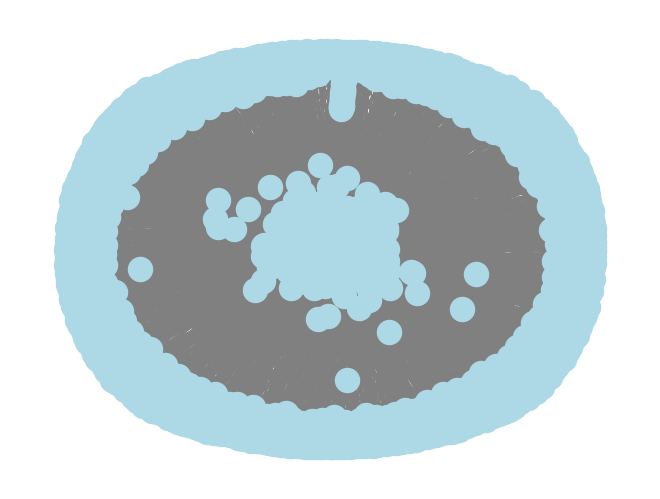

In [67]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the adjacency matrix from the text file
adjacency_matrix = np.loadtxt('adjacency_matrix.txt', dtype=int)

# Create a directed graph
graph = nx.DiGraph()

# Add nodes to the graph
num_nodes = adjacency_matrix.shape[0]
graph.add_nodes_from(range(num_nodes))

# Add edges to the graph based on the adjacency matrix
for i in range(num_nodes):
    for j in range(num_nodes):
        if adjacency_matrix[i][j] == 1:
            graph.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=False, node_color='lightblue', edge_color='gray', arrows=True)
plt.show()



AttributeError: partially initialized module 'pandas' has no attribute '_pandas_datetime_CAPI' (most likely due to a circular import)

In [1]:

URI = "NEO4J_URI=neo4j+s://3f3ab051.databases.neo4j.io"
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = "o8vcXWgBEyvLvmQ2AckVL2r3HVWNPZO-k3ZCUvowsrM"

AURA_INSTANCEID = "3f3ab051"
AURA_INSTANCENAME = "Instance01"

AUTH = (NEO4J_USERNAME, NEO4J_PASSWORD)
